In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
import json

# Load the datasets

In [2]:
customers_df = pd.read_csv('/content/Customers.csv')
products_df = pd.read_csv('/content/Products.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

# Inspect the datasets

In [3]:
print("Customers Data:")
print(customers_df.head())
print(customers_df.info())
print(customers_df.describe())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carrol

In [4]:
print("\nProducts Data:")
print(products_df.head())
print(products_df.info())
print(products_df.describe())


Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [5]:
print("\nTransactions Data:")
print(transactions_df.head())
print(transactions_df.info())
print(transactions_df.describe())


Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 n

# Check for missing values

In [6]:
print("\nMissing Values in Customers:")
print(customers_df.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [7]:
print("\nMissing Values in Products:")
print(products_df.isnull().sum())


Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [8]:
print("\nMissing Values in Transactions:")
print(transactions_df.isnull().sum())


Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Data Cleaning - Convert date columns to datetime format

In [9]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Check for duplicates

In [10]:
print("\nDuplicate Customers:", customers_df.duplicated().sum())
print("Duplicate Products:", products_df.duplicated().sum())
print("Duplicate Transactions:", transactions_df.duplicated().sum())


Duplicate Customers: 0
Duplicate Products: 0
Duplicate Transactions: 0



# Summary statistics

In [11]:
print("\nTransaction Value Statistics:")
print(transactions_df['TotalValue'].describe())


Transaction Value Statistics:
count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64


# Visualizations

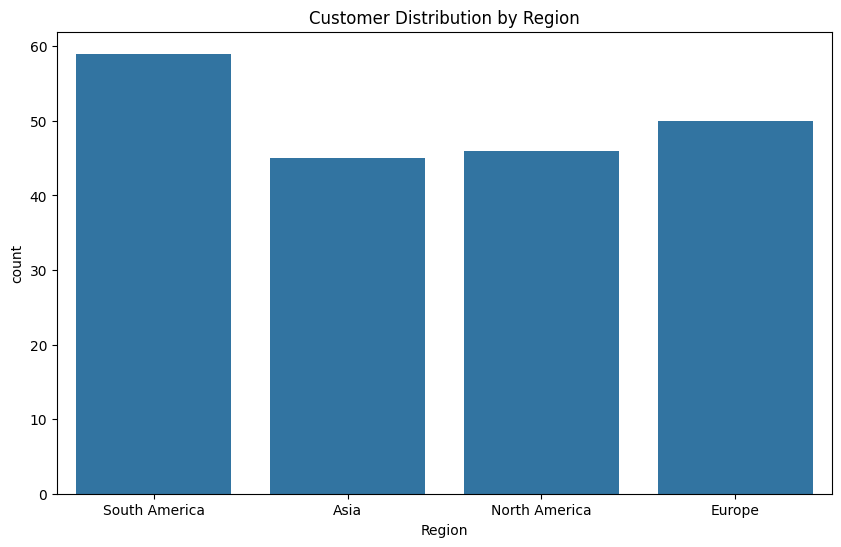

In [12]:
#Customer Distribution by Region
plt.figure(figsize=(10,6))
sns.countplot(x='Region', data=customers_df)
plt.title('Customer Distribution by Region')
plt.show()

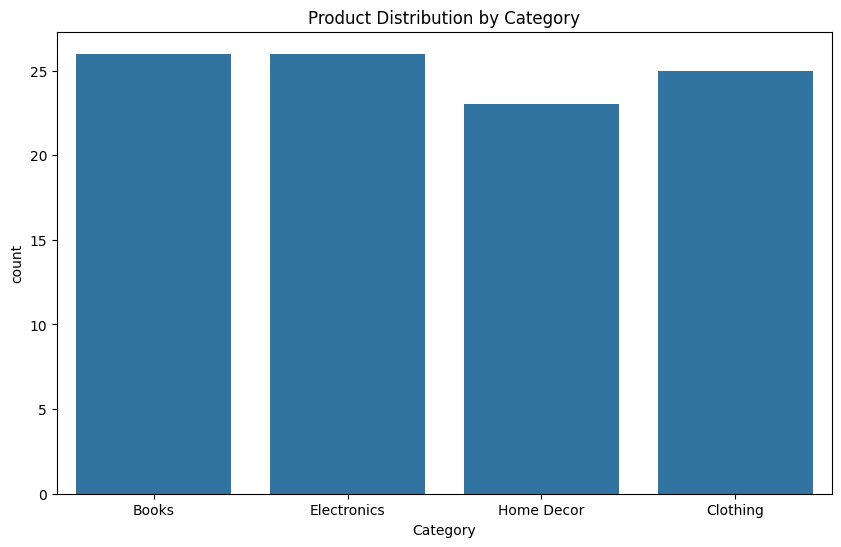

In [13]:
#Product Distribution by Category
plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=products_df)
plt.title('Product Distribution by Category')
plt.show()

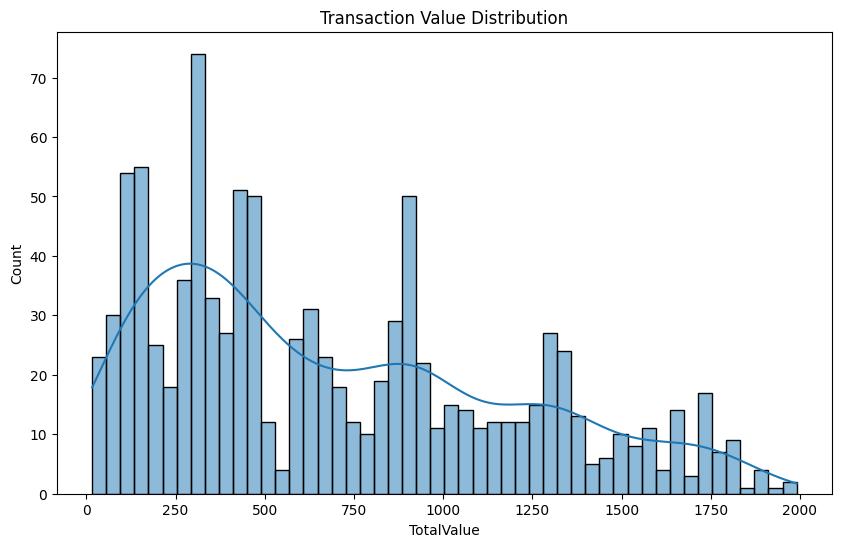

In [14]:
#Transaction Value Distribution
plt.figure(figsize=(10,6))
sns.histplot(transactions_df['TotalValue'], bins=50, kde=True)
plt.title('Transaction Value Distribution')
plt.show()